# Explicando os modelos de regressão

In [1]:
import pandas as pd
from sklearn import (
    model_selection,
    preprocessing
)
from sklearn.model_selection import train_test_split
from pathlib import Path

In [2]:
ROOT_DIR = Path.cwd().parent
DATA = ROOT_DIR / 'datasets' / 'housing.csv'

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv(DATA, header=None, delimiter=r"\s+", names=column_names)

In [4]:
# a target do dataset de boston é o MEDV
bos_y = df.MEDV
bos_X = df.drop('MEDV', axis=1)
bos_X_train, bos_X_test, bos_y_train, bos_y_test = train_test_split(bos_X, bos_y, test_size=0.3, random_state=42)

In [5]:
bos_sX = preprocessing.StandardScaler().fit_transform(bos_X)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = train_test_split(bos_sX, bos_y, test_size=0.3, random_state=42)

In [6]:
import xgboost as xgb

In [7]:
xgr = xgb.XGBRegressor(random_state=42, base_score=0.5)

In [8]:
xgr.fit(bos_X_train, bos_y_train)

XGBRegressor(base_score=0.5, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [9]:
sample_idx = 5
xgr.predict(bos_X.iloc[[sample_idx]])

array([28.698956], dtype=float32)

In [10]:
import shap

In [11]:
shap.initjs()

In [12]:
exp = shap.TreeExplainer(xgr) # explainer object
vals = exp.shap_values(bos_X) # shap values

In [13]:
shap.force_plot(
    exp.expected_value,
    vals[sample_idx],
    bos_X.iloc[[sample_idx]]
)

In [14]:
shap.force_plot(
    exp.expected_value, vals, bos_X
)

In [15]:
import matplotlib.pyplot as plt

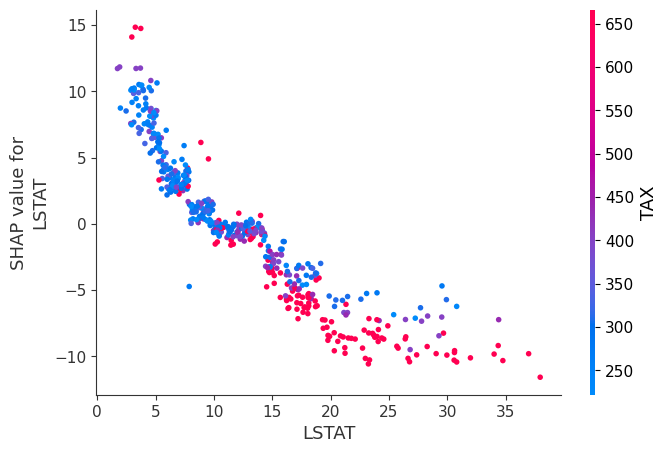

In [18]:
shap.dependence_plot('LSTAT', vals, bos_X)

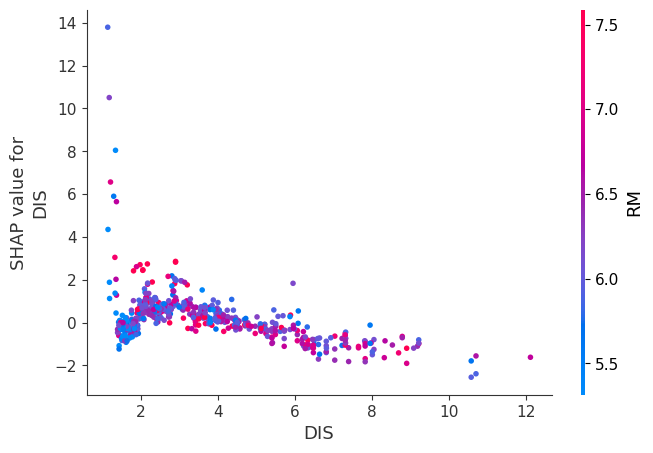

In [19]:
shap.dependence_plot('DIS', vals, bos_X, interaction_index='RM')

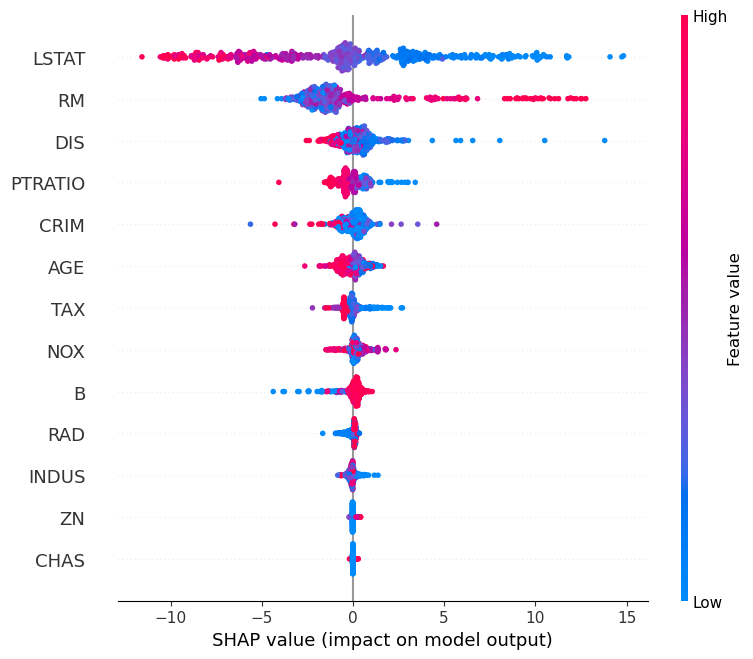

In [20]:
shap.summary_plot(
    vals, bos_X
)